In [12]:
# SCRIPT PRINCIPAL

caminho_dados = "/content/drive/MyDrive/Pandas-intro/2025_Viagem.csv"
caminho_saida_tab = "/content/drive/MyDrive/Pandas-intro/OutPut/2025_Viagem_final.xlsx"
caminho_saida_grafico1 = "/content/drive/MyDrive/Pandas-intro/OutPut/Fig_GF1.png"
caminho_saida_grafico2 = "/content/drive/MyDrive/Pandas-intro/OutPut/Fig_GF2.png"

import pandas as pd

df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";")

pd.set_option('display.max_columns', None)

# Convertendo dados
df_viagens["Valor diárias"] = df_viagens["Valor diárias"].str.replace(",",".").astype(float)
df_viagens["Valor passagens"] = df_viagens["Valor passagens"].str.replace(",",".").astype(float)
df_viagens["Valor devolução"] = df_viagens["Valor devolução"].str.replace(",",".").astype(float)
df_viagens["Valor outros gastos"] = df_viagens["Valor outros gastos"].str.replace(",",".").astype(float)

# Adicionando coluna da soma de todos os gastos
df_viagens['Total de gastos'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor devolução'] + df_viagens['Valor outros gastos']
df_viagens[['Nome', 'Valor diárias', 'Valor passagens', 'Valor devolução', 'Valor outros gastos']]

# Remove todos os dados nulos da tabela e adiciona um valor para identificação dos nulos
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')
df_viagens['Cargo']

# Convertendo datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

# Adicionando novas colunas coluna dos dias das datas
(df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()

# Tabela agregada e consolidada para analise mais avançada
df_cargos_filtrados_principais = df_viagens.groupby('Cargo').agg(
    despesa_media=('Total de gastos', 'mean'),
    duracao_media=('Dias de viagem', 'mean'),
    num_viagens=('Nome', 'count'),
    despesas_totais=('Total de gastos', 'sum'),
    mes_viagem=('Mês da viagem', 'unique')

    ).reset_index().sort_values('despesas_totais', ascending=False)

      # Análise 1:
      # Criando início do filtro para identificar cargos com mais do que 1% de viagens realizadas
df_pct_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_pct_cargos.loc[df_pct_cargos['proportion'] > 0.01, 'Cargo']
cargos_relevantes = df_pct_cargos.loc[df_pct_cargos['proportion'] > 0.01, 'Cargo']
      # Filtro final:
df_filtroMAX = df_cargos_filtrados_principais['Cargo'].isin(cargos_relevantes)
df_tab_final = df_cargos_filtrados_principais[df_filtroMAX]

      # Análise 2:
      # Quantidade de servidores públicos que gastaram mais de 175 mil
(df_viagens['Total de gastos'] > 175_000).value_counts()

ft_maiores_gastos = df_viagens['Total de gastos'] > 175_000
df_viagens[ft_maiores_gastos]


      # Relacionandos os gastos com outro arquivo .csv que contêm dados sobre as passagens
caminho_passagens = "/content/drive/MyDrive/Pandas-intro/2025_Passagem.csv"
df_passagens = pd.read_csv(caminho_passagens, encoding="Windows-1252", sep=";")

      # Identificando gastos de um uníco servidor público
ft_id_passagem = df_passagens['Identificador do processo de viagem'] == 20829850
df_passagens[ft_id_passagem]

      # Combinando as tabelas
df_passagens_combinado = df_viagens.merge(df_passagens, on='Identificador do processo de viagem', how='left')
ft2_passagens = df_passagens_combinado['Total de gastos'] > 175_000

df_passagens_combinado[ft2_passagens]

# Salvando a tabela final
df_tab_final.to_excel(caminho_saida_tab)

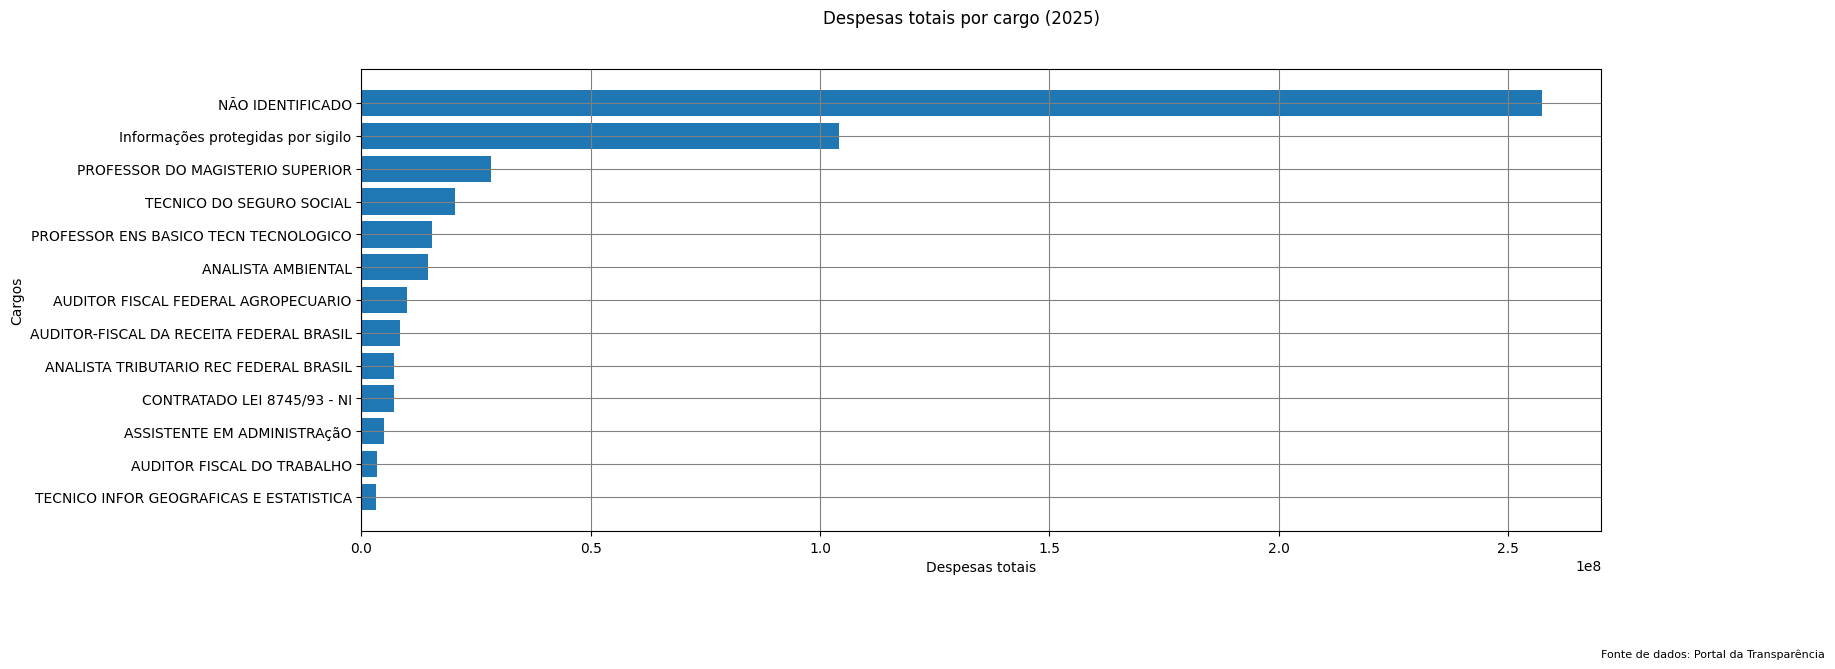

In [6]:
# Criando gráficos a partir da tabela final

      # Gráfico básico
#df_tab_final = df_tab_final.sort_values('despesas_totais', ascending=False)
#df_tab_final.plot.bar(x='Cargo', y='despesas_totais')


      # Gráfico mais completo com a biblioteca MatPlotlib
import matplotlib.pyplot as plt

# GRÁFICO 1
fig, ax = plt.subplots(figsize=(16,6))

fig.suptitle('Despesas totais por cargo (2025)')
ax.set_xlabel('Despesas totais')
ax.set_ylabel('Cargos')

plt.grid(color='gray')

ax.barh(df_tab_final['Cargo'], df_tab_final['despesas_totais'])
ax.invert_yaxis()

plt.figtext(0.90, -0.1, 'Fonte de dados: Portal da Transparência', fontsize=8)

# Salvando o gráfico 1
plt.savefig(caminho_saida_grafico1, bbox_inches='tight')

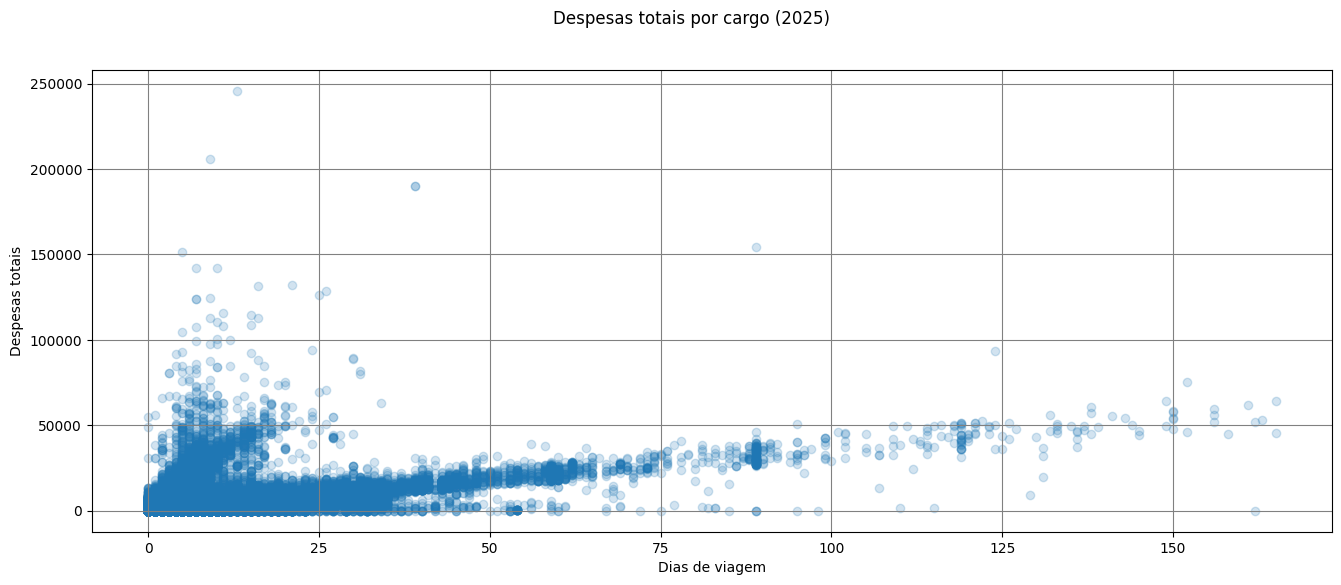

In [7]:
# GRÁFICO 2
fig, ax = plt.subplots(figsize=(16,6))

fig.suptitle('Despesas totais por cargo (2025)')
ax.set_xlabel('Dias de viagem')
ax.set_ylabel('Despesas totais')


ax.scatter(df_viagens['Dias de viagem'], df_viagens['Total de gastos'], alpha=0.2)

# selecionando uma área limitada do gráfico
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 250_000)



plt.grid(color='gray')

# Salvando o gráfico 2
plt.savefig(caminho_saida_grafico2, bbox_inches='tight')